# Real Estate Market Analysis and Value Prediction

Purpose and scope:

* The objective of this project is to solve a real-world problem.

The project consists of three sections:
* Part 1: Deciding which data will help solve the problem and where to obtain it.
* Part 2: Using the dataset to address the problem.
* Part 3: Using machine learning tools to predict the variable of interest.

Property for sale dataset used: www.properati.com.ar

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 1. Loading the dataset
Load the dataset using Pandas' functionalities. Print how many rows and columns it has and its first five instances.

In [ ]:
#Cargo el dataset 'properati' para comenzar con el sprint1
propiedades = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
dataframe = pd.DataFrame(propiedades)

In [ ]:
#observo las primeras lineas del dataset
propiedades.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [ ]:
#observo la dimension/forma del dataframe. Observo asi Nº de filas y columnas
print(propiedades.shape, 'son la cantidad de instancias y columnas que tiene el dataset, respectivamente')

(146660, 19) son la cantidad de instancias y columnas que tiene el dataset, respectivamente


### 2. EDA

2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [ ]:
#Para observar los nombres de columnas y la cantidad de datos faltantes, genero con dichas columnas del dataframe y contabilizo los valores NaN (son valores faltantes)
lista = list(propiedades.columns)
print(lista)

['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price', 'currency', 'title', 'description', 'property_type', 'operation_type']


In [ ]:
#Observo con la funcion isna y sum la cantidad de NaN que exiten en cada columna del dataset
for i in lista:
    print (i, ': ', propiedades[i].isna().sum())

start_date :  0
end_date :  0
created_on :  0
lat :  9925
lon :  9959
l1 :  0
l2 :  0
l3 :  0
rooms :  0
bedrooms :  0
bathrooms :  5957
surface_total :  20527
surface_covered :  21614
price :  0
currency :  0
title :  0
description :  0
property_type :  0
operation_type :  0


3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

In [ ]:
#me quedo con el tipo de pripiedad como variable categorica
tipo_propiedad = list(propiedades['property_type'].unique())
print(tipo_propiedad)

['Departamento', 'PH', 'Casa', 'Lote', 'Casa de campo', 'Oficina', 'Otro', 'Local comercial', 'Cochera', 'Depósito']


In [ ]:
#contabilizo la cantidad de estas propiedad
numero_propiedad = list(propiedades['property_type'].value_counts())
print(numero_propiedad)

[107326, 21521, 14298, 1312, 658, 374, 325, 322, 265, 259]


Text(0.5, 0, 'Tipo de propiedad')

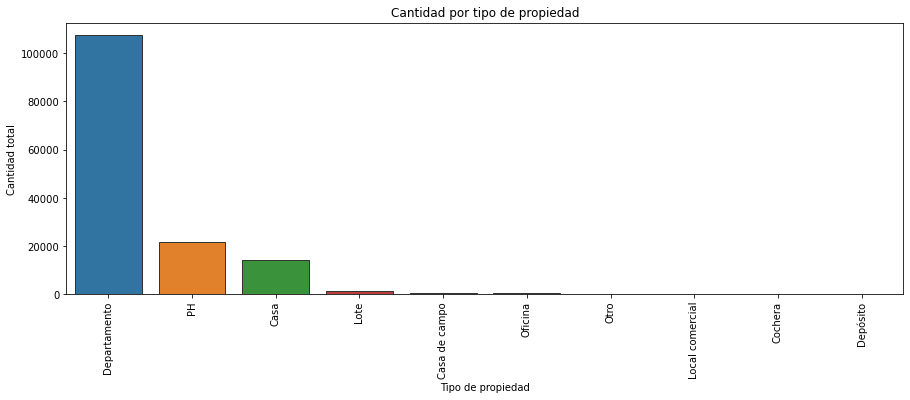

In [ ]:
#grafico dicha informacion creando un Barplot
plt.figure(figsize=(15,5))
grafico = sns.barplot(x = tipo_propiedad, y = numero_propiedad, edgecolor=".2")
plt.xticks(rotation=90)  #esto lo vimos con nahuel para mejorar la posicion de las etiquetas en el eje x
plt.title('Cantidad por tipo de propiedad')
plt.ylabel('Cantidad total')
plt.xlabel('Tipo de propiedad')

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

In [ ]:
#Para enfocar en las regiones de las publicaciones, guardo en distintas Variables la informacion que me sirve para revelar lo solicitado (variables l2 y l3)

#variable l2
varible_l2 = list(propiedades['l2'].unique())
cantidad_l2 = list(propiedades['l2'].value_counts())

#variable l3
varible_l3 = list(propiedades['l3'].unique())
cantidad_l3 = list(propiedades['l3'].value_counts())

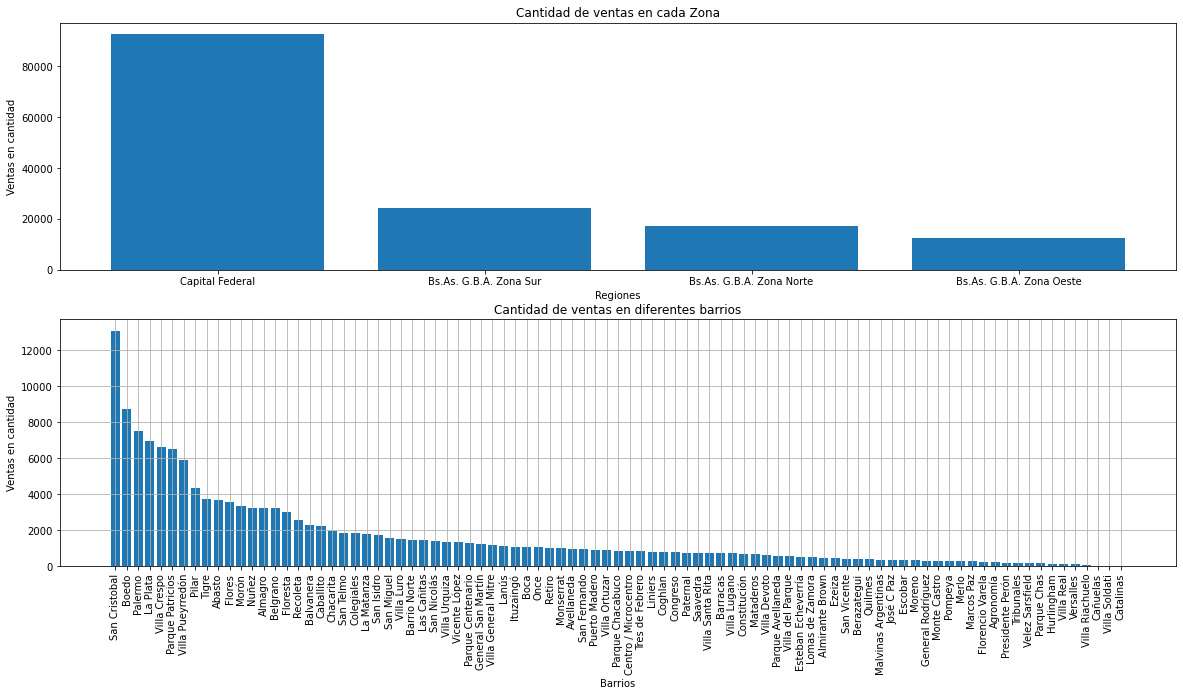

In [ ]:
#Ahora que tengo los datos necesarios guardados en varibles, grafico para hacer visual lo solicitado
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)

#grafico variable l2
plt.title('Cantidad de ventas en cada Zona')
plt.xlabel('Regiones')
plt.ylabel('Ventas en cantidad')
plt.bar(varible_l2,cantidad_l2)
ax=plt.subplot(2,1,2)

#grafico variable l2
plt.title('Cantidad de ventas en diferentes barrios')
plt.xlabel('Barrios')
plt.ylabel('Ventas en cantidad')
plt.bar(varible_l3,cantidad_l3)
plt.xticks(rotation=90) #aqui acomodo las etiquetas del eje 'x' para que sean visibles
plt.grid()

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [ ]:
#Al graficar el punto anterior, puedo observar las 3 clases de propiedad con mas cantidad. Ahora las selecciono de la siguiente manera, dentro de la region donde se concentran
#de mayor manera:

#con la visualizacion de estos datos observo que: las tres clases más abundantes de tipos de propiedad son (Departamento,), (PH,), (Casa,) y la región
#con más propiedades publicadas es CABA (l2) con todos los barrios que incluye.

#Resuelvo de la siguiente manera:
data_select_MayorCant_Region_TipoPropiedad = propiedades[propiedades['property_type'].isin(['Casa','PH','Departamento']) & (propiedades['l2'] == 'Capital Federal')]
data_select_MayorCant_Region_TipoPropiedad.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
5,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta


In [ ]:
#Observo con shape la dimension del nuevo dataframe filtrado por 3 tipo de propiedad con mayor cantidad y en la region con mas propiedades publicadas
print(data_select_MayorCant_Region_TipoPropiedad.shape, 'son la cantidad de instancias y columnas que tiene el nuevo dataset filtrado, respectivamente')

(91485, 19) son la cantidad de instancias y columnas que tiene el nuevo dataset filtrado, respectivamente


**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

In [ ]:
#Ahora estudio las variables rooms, bedrooms, bathrooms, surface_total, surface_covered y price para cada tipo de propiedad para responder a cada punto.
#A. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables.

data_select_to_statistics = data_select_MayorCant_Region_TipoPropiedad.loc[:,['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price', 'property_type']]
data_select_to_statistics

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,2.0,1.0,1.0,56.0,56.0,150000.0,PH
...,...,...,...,...,...,...,...
146554,4.0,3.0,3.0,175.0,111.0,570000.0,PH
146555,3.0,2.0,2.0,144.0,134.0,480000.0,PH
146556,4.0,2.0,2.0,317.0,143.0,530000.0,PH
146557,3.0,2.0,2.0,145.0,145.0,420000.0,Departamento


In [ ]:
estadisticos = data_select_to_statistics.describe().T
estadisticos

,count,mean,std,min,25%,50%,75%,max
rooms,91485.0,2.964278,1.314704,1.0,2.0,3.0,4.0,26.0
bedrooms,91485.0,1.960278,1.072946,0.0,1.0,2.0,3.0,15.0
bathrooms,89314.0,1.560147,0.860309,1.0,1.0,1.0,2.0,14.0
surface_total,82568.0,112.626369,980.713664,10.0,49.0,71.0,111.0,126062.0
surface_covered,82250.0,94.966310,778.515243,1.0,44.0,63.0,96.0,126062.0
price,91485.0,259500.258239,322265.440799,6000.0,120000.0,175000.0,279000.0,32434232.0


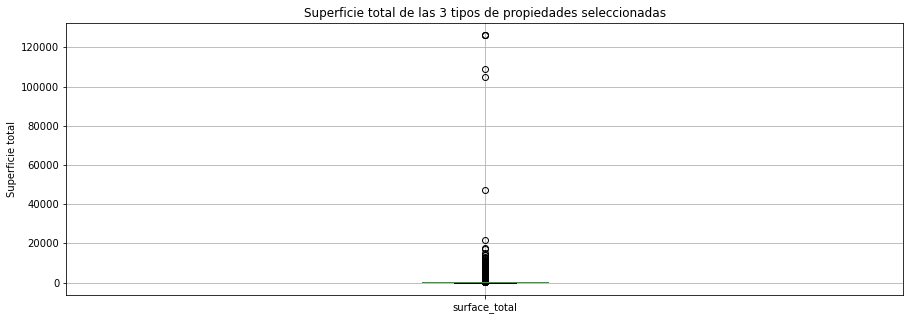

In [ ]:
#B. Algunas instancias tienen valores de superficie (surface_total) muy grandes y dificultan la correcta visualización.
#Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles.
#Puede ser útil un boxplot para determinar un rango razonable.

#C. Lo mismo ocurre con valores de superficie total (surface_total) muy chico.


#grafico con boxplot sin el filtrado correspondiente, para con la ayuda de los estadisticos y el boxplot visualizar y seleccionar los nuevos valores extremos de surface_total
plt.figure(figsize=(15,5))
boxplot = data_select_to_statistics.boxplot(column = ['surface_total'])
plt.title('Superficie total de las 3 tipos de propiedades seleccionadas')
plt.ylabel('Superficie total')
boxplot.plot()
plt.show()




In [ ]:
#B. Algunas instancias tienen valores de superficie (surface_total) muy grandes y dificultan la correcta visualización.

#C. Lo mismo ocurre con valores de superficie total (surface_total) muy chico.

#creo entonces 1 mascara/filtro para eliminar valores extremos y poder graficar con boxplots, de acuerdo a los valores observados en los estadisticos y el boxplot anterior.
mascara_filter = np.logical_and(data_select_to_statistics.surface_total > 5, data_select_to_statistics.surface_total < 200)
data_select_to_statistics[mascara_filter]

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,2.0,1.0,1.0,56.0,56.0,150000.0,PH
...,...,...,...,...,...,...,...
146552,4.0,2.0,3.0,159.0,98.0,539000.0,Departamento
146553,4.0,3.0,2.0,106.0,100.0,620000.0,Departamento
146554,4.0,3.0,3.0,175.0,111.0,570000.0,PH
146555,3.0,2.0,2.0,144.0,134.0,480000.0,PH


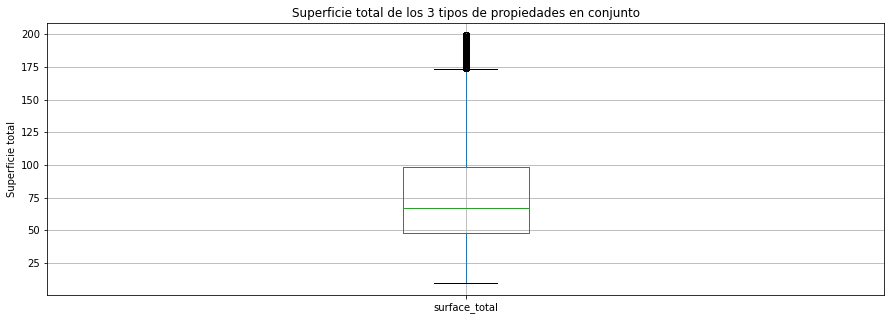

In [ ]:
#Nuevo grafico con el filtro aplicado en la variable surface_total.
plt.figure(figsize=(15,5))
boxplot = data_select_to_statistics[mascara_filter].boxplot(column = ['surface_total'])
plt.title('Superficie total de los 3 tipos de propiedades en conjunto')
plt.ylabel('Superficie total')
boxplot.plot()
plt.show()

[Text(0.5, 1.0, 'Superficie total de los tipos de propiedades individuales')]

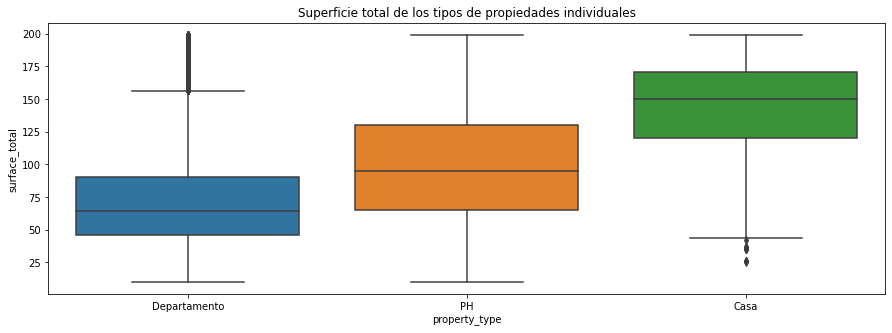

In [ ]:
#Utilizo la libreria Seaborn y grafico el dataset filtrado en surface_total en los 3 tipos de propiedades, y asi hacer mas visual como funcionó el filtrado
df_surface_total_filter = data_select_to_statistics[mascara_filter]
plt.figure(figsize=(15,5))
sns.boxplot(data = df_surface_total_filter, y = 'surface_total', x = 'property_type').set(title='Superficie total de los tipos de propiedades individuales')

In [ ]:
#D. Las propiedades no pueden tener surface_covered mayor a surface_total. Si eso sucede, debes filtrar esas instancias.
filter_surface_covered = df_surface_total_filter[df_surface_total_filter.surface_covered <= df_surface_total_filter.surface_total]
filter_surface_covered

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,2.0,1.0,1.0,56.0,56.0,150000.0,PH
...,...,...,...,...,...,...,...
146552,4.0,2.0,3.0,159.0,98.0,539000.0,Departamento
146553,4.0,3.0,2.0,106.0,100.0,620000.0,Departamento
146554,4.0,3.0,3.0,175.0,111.0,570000.0,PH
146555,3.0,2.0,2.0,144.0,134.0,480000.0,PH


In [ ]:
#E. El rango de precios que toman las propiedades es muy amplio.
#Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles.
#Puede ser útil un boxplot para determinar un rango razonable.

estadisticos_price = filter_surface_covered.describe().T
estadisticos_price

,count,mean,std,min,25%,50%,75%,max
rooms,74582.0,2.810423,1.068814,1.0,2.0,3.0,3.0,21.0
bedrooms,74582.0,1.854429,0.900208,0.0,1.0,2.0,2.0,15.0
bathrooms,73827.0,1.434150,0.695378,1.0,1.0,1.0,2.0,14.0
surface_total,74582.0,77.386997,38.685120,12.0,48.0,67.0,98.0,199.0
surface_covered,74582.0,68.605454,33.804727,1.0,43.0,60.0,84.0,199.0
price,74582.0,212999.563769,192825.395574,6000.0,120000.0,169000.0,250000.0,32434232.0


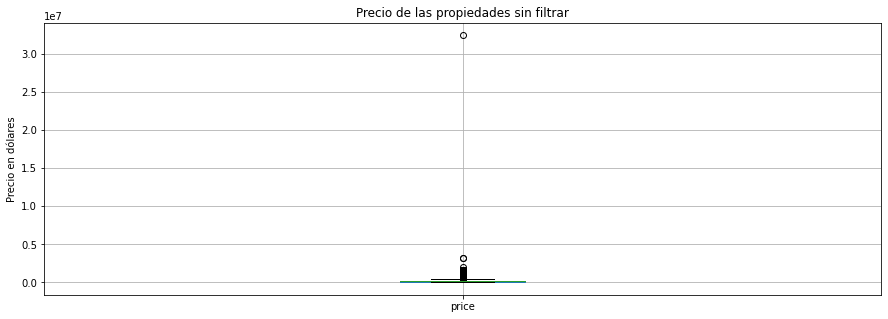

In [ ]:
#grafico price
plt.figure(figsize=(15,5))
boxplot = filter_surface_covered.boxplot(column = ['price'])
plt.title('Precio de las propiedades sin filtrar')
plt.ylabel('Precio en dólares')
boxplot.plot()
plt.show()

In [ ]:
#observo la dimension del dataset previo al filtrado
print(filter_surface_covered.shape)

(74582, 7)


In [ ]:
filter_price = np.logical_and(filter_surface_covered.price > 6000, filter_surface_covered.price < 450000)
df_ultimo_filtro = filter_surface_covered[filter_price]

In [ ]:
#observo la dimension del dataset luego filtrado
print(df_ultimo_filtro.shape)

(69940, 7)


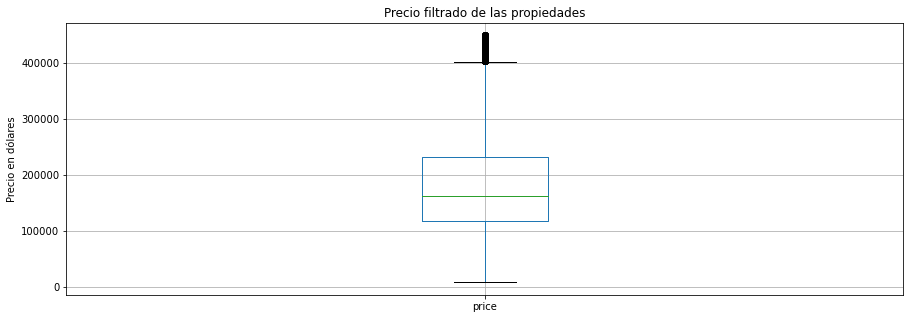

In [ ]:
#Ahora grafico el dataset con los diferentes filtros aplicados
plt.figure(figsize=(15,5))
boxplot = df_ultimo_filtro.boxplot(column = ['price'])
plt.title('Precio filtrado de las propiedades')
plt.ylabel('Precio en dólares')
boxplot.plot()
plt.show()

[Text(0.5, 1.0, 'Precio filtrado por cada tipo de propiedad')]

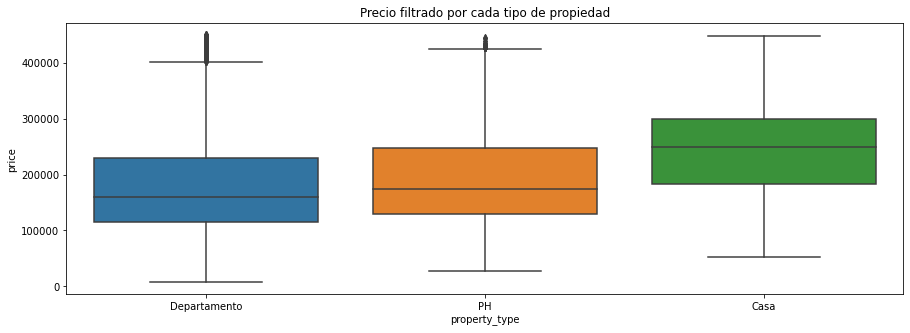

In [ ]:
#grafico con Seaborn
plt.figure(figsize=(15,5))
sns.boxplot(data = df_ultimo_filtro, x = 'property_type',y = 'price').set(title='Precio filtrado por cada tipo de propiedad')

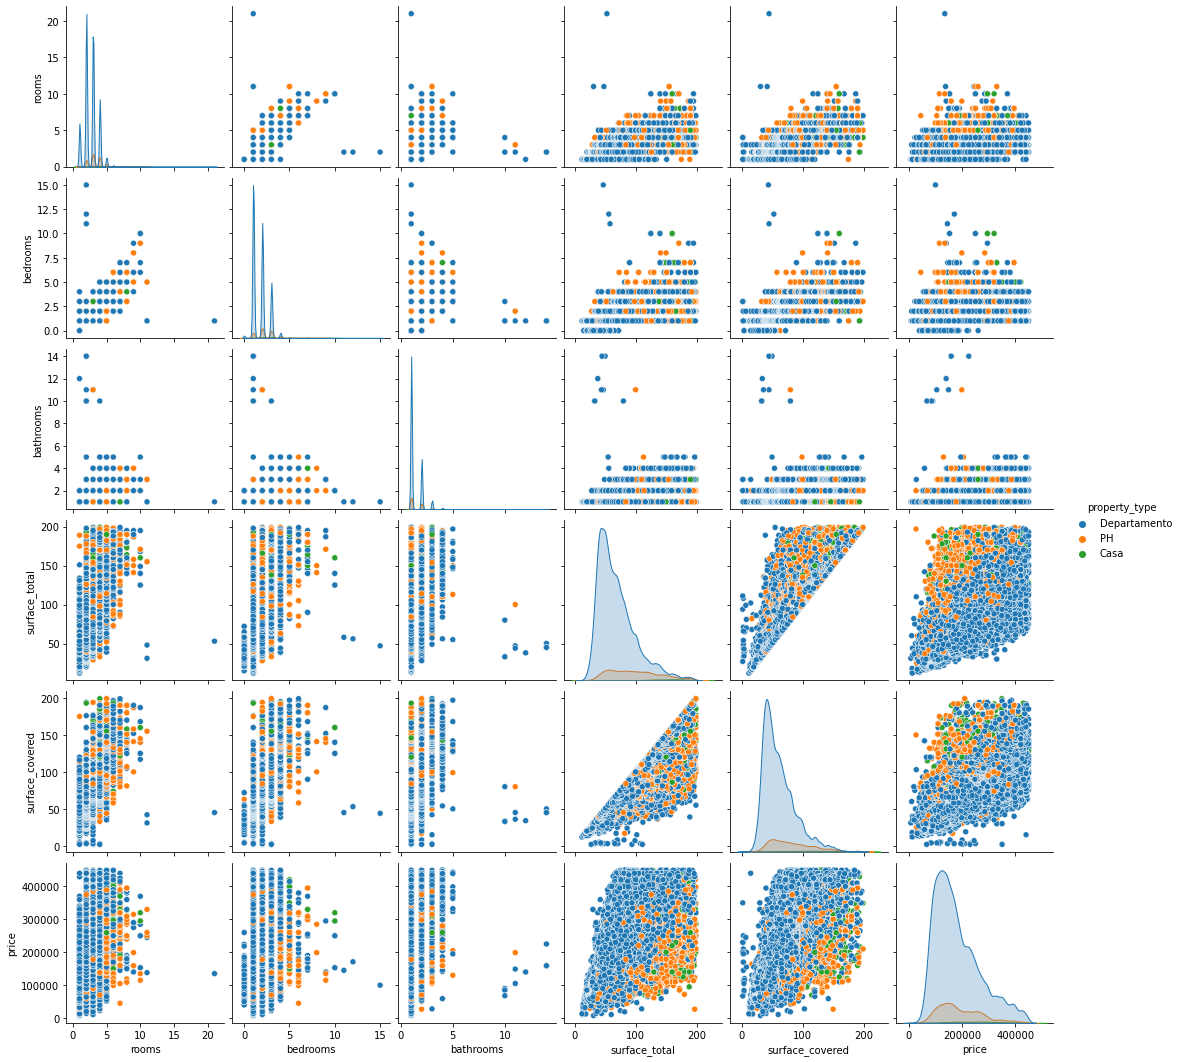

In [ ]:
#F. Una vez filtrado el dataset, puedes utilizar la función pairplot de Seaborn
sns.pairplot(df_ultimo_filtro, hue = 'property_type')

7. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

In [ ]:
#7 Correlaciones entre variables: rooms, bedrooms, bathrooms, surface_total, surface_covered, price.
df_ultimo_filtro.shape

(69940, 7)

In [ ]:
#correlacion entre las variables rooms, bedrooms, bathrooms, surface_total, surface_covered, price y el tipo de propiedad
df_ultimo_filtro.corr()

correlacion_7 = df_ultimo_filtro.corr()
correlacion_7

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.931506,0.499204,0.752844,0.802092,0.577145
bedrooms,0.931506,1.000000,0.504177,0.736698,0.792393,0.556756
bathrooms,0.499204,0.504177,1.000000,0.569741,0.606007,0.593265
surface_total,0.752844,0.736698,0.569741,1.000000,0.921283,0.725225
surface_covered,0.802092,0.792393,0.606007,0.921283,1.000000,0.738196
price,0.577145,0.556756,0.593265,0.725225,0.738196,1.000000


[Text(0.5, 1.0, 'Heatmap de las correlaciones generadas')]

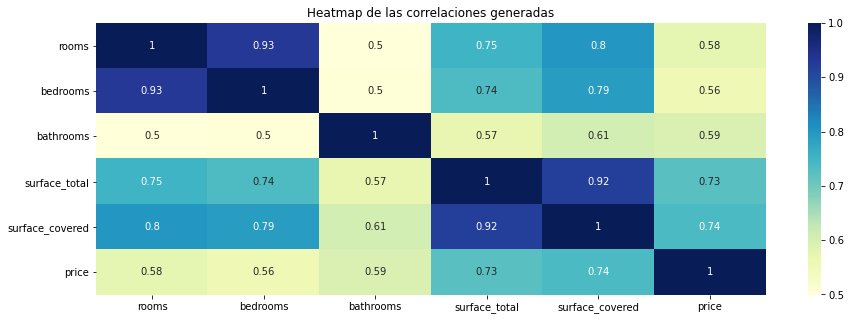

In [ ]:
plt.figure(figsize=(15,5))
sns.heatmap(correlacion_7, annot=True, cmap="YlGnBu").set(title='Heatmap de las correlaciones generadas')

In [ ]:
#¿Qué diferencias encuentras según cada tipo de propiedad? DEPARTAMENTO
data_cor_departamento = df_ultimo_filtro[df_ultimo_filtro['property_type'].isin(['Departamento'])]
data_cor_departamento.corr()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.925446,0.509520,0.752341,0.800942,0.588748
bedrooms,0.925446,1.000000,0.517967,0.739626,0.790623,0.566635
bathrooms,0.509520,0.517967,1.000000,0.613482,0.631658,0.603581
surface_total,0.752341,0.739626,0.613482,1.000000,0.934442,0.775032
surface_covered,0.800942,0.790623,0.631658,0.934442,1.000000,0.767466
price,0.588748,0.566635,0.603581,0.775032,0.767466,1.000000


In [ ]:
#¿Qué diferencias encuentras según cada tipo de propiedad? CASA
data_cor_casa = df_ultimo_filtro[df_ultimo_filtro['property_type'].isin(['Casa'])]
data_cor_casa.corr()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.886145,0.324442,0.506934,0.531907,0.338750
bedrooms,0.886145,1.000000,0.345536,0.453053,0.504531,0.328176
bathrooms,0.324442,0.345536,1.000000,0.239120,0.338595,0.352115
surface_total,0.506934,0.453053,0.239120,1.000000,0.790659,0.472247
surface_covered,0.531907,0.504531,0.338595,0.790659,1.000000,0.481228
price,0.338750,0.328176,0.352115,0.472247,0.481228,1.000000


In [ ]:
#¿Qué diferencias encuentras según cada tipo de propiedad? PH
data_cor_ph = df_ultimo_filtro[df_ultimo_filtro['property_type'].isin(['PH'])]
data_cor_ph.corr()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.942857,0.458087,0.663525,0.748990,0.555452
bedrooms,0.942857,1.000000,0.449502,0.639721,0.746553,0.550222
bathrooms,0.458087,0.449502,1.000000,0.457419,0.547353,0.522147
surface_total,0.663525,0.639721,0.457419,1.000000,0.835757,0.642537
surface_covered,0.748990,0.746553,0.547353,0.835757,1.000000,0.704659
price,0.555452,0.550222,0.522147,0.642537,0.704659,1.000000


### 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.


In [ ]:
import folium
dataframe_lat_lon = propiedades[300:500]
dataframe_lat_lon = dataframe_lat_lon[dataframe_lat_lon['lat'].notna()]
dataframe_lat_lon = dataframe_lat_lon[dataframe_lat_lon['lon'].notna()]

In [ ]:
colors = {'Casa':'red', 'Departamento':'green', 'PH':'blue', 'Deposito':'black', 'Lote':'grey', 'Casa de Campo':'white', 'Oficina':'pink',
         'Otro':'yellow', 'Local comercial':'purple', 'Cochera':'orange'}

map_position = folium.Map(location=[-34.604896, -58.4653036762513], zoom_start=11)

dataframe_lat_lon.apply(lambda row:folium.CircleMarker(location=[row['lat'], row['lon']],
                                               radius=3, fill_opacity=1, color=colors[row['property_type']],
                                               fill_color=colors[row['property_type']]).add_to(map_position),axis=1)

map_position

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`).
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué?
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

In [ ]:
#Para comenzar con este ultimo punto de Machine learning y hacer un modelo bechmark, comienzo cargando nuevamente el dataset completo y aplico los filtros recomendados.
#El modelo bechmark es de simple uso y el primero a usar para luego comparar con modelos mas complejos:

propiedades = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
dataframe= pd.DataFrame(propiedades)

In [ ]:
#aplico ahora el filtrado correspondiente a:
#Selecciono ropiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa, cuya superficie total es menor a 1000 m2 y mayor a 15 m2, y de precio menor 4000000 dólares.
#Ademas, selecciono las columnas rooms, bedrooms, bathrooms, surface_total, surface_covered y price, descartando valores faltantes.
propiedades_filter = propiedades[(propiedades.l2 == 'Capital Federal') & (propiedades.property_type.isin(['Departamento','Casa','PH']) & (propiedades.surface_total>=15) & (propiedades.surface_total<=1000) & (propiedades.price<=4000000))].drop(columns=['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1','l2','property_type', 'l3', 'currency', 'title', 'description', 'operation_type']).dropna()
propiedades_filter.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,7.0,7.0,2.0,140.0,140.0,153000.0
1,2.0,1.0,2.0,70.0,58.0,159000.0
2,2.0,1.0,1.0,45.0,45.0,125000.0
3,2.0,1.0,1.0,85.0,50.0,295000.0
5,2.0,1.0,1.0,56.0,56.0,150000.0


In [ ]:
#observo si la dimension coincide con el Checkpoint
propiedades_filter.shape

(81019, 6)

In [ ]:
#Observo los estadisticos para tener una idea de como es el dataset filtrado
propiedades_filter.describe().T

,count,mean,std,min,25%,50%,75%,max
rooms,81019.0,3.009652,1.308602,1.0,2.0,3.0,4.0,26.0
bedrooms,81019.0,2.002037,1.049673,0.0,1.0,2.0,3.0,15.0
bathrooms,81019.0,1.553821,0.852672,1.0,1.0,1.0,2.0,14.0
surface_total,81019.0,95.361779,77.253578,15.0,49.0,71.0,111.0,1000.0
surface_covered,81019.0,84.928535,156.133119,1.0,44.0,63.0,96.0,17220.0
price,81019.0,263772.525543,298949.856656,6000.0,125000.0,180000.0,280000.0,4000000.0


In [ ]:
#Observo la correlacion entre las variables del dataset
df_ML_corr = propiedades_filter.corr()
df_ML_corr

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.925604,0.601887,0.725799,0.304407,0.479972
bedrooms,0.925604,1.000000,0.605002,0.695523,0.291140,0.442418
bathrooms,0.601887,0.605002,1.000000,0.651924,0.275936,0.638737
surface_total,0.725799,0.695523,0.651924,1.000000,0.375749,0.686459
surface_covered,0.304407,0.291140,0.275936,0.375749,1.000000,0.298212
price,0.479972,0.442418,0.638737,0.686459,0.298212,1.000000


[Text(0.5, 1.0, 'Heatmap de correlaciones entre las variables para ML')]

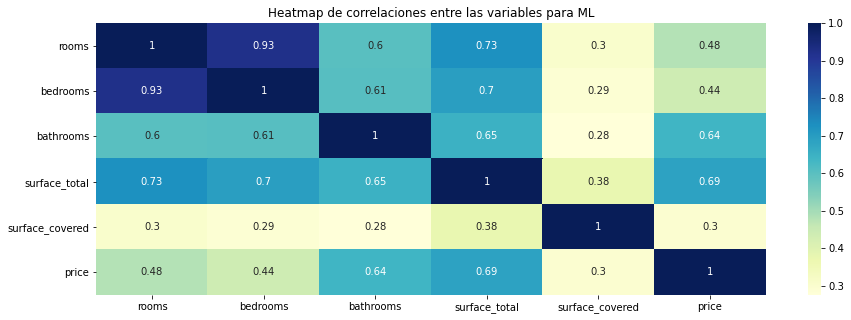

In [ ]:
plt.figure(figsize=(15,5))
sns.heatmap(df_ML_corr, annot=True, cmap="YlGnBu").set(title='Heatmap de correlaciones entre las variables para ML')

In [ ]:
#Seleccionar las variables predictoras (X) y la variable a predecir (y).
#De acuerdo con las correlaciones observadas, las variables 'bathrooms' y 'surface_total' son las que mas correlacionan respecto al precio.
x1 = propiedades_filter['bathrooms']
x2 = propiedades_filter['surface_total']
y = propiedades_filter['price']

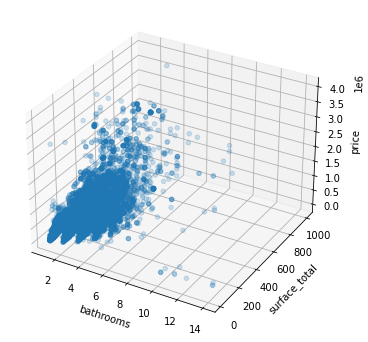

In [ ]:
#Visualizo con un scatterplt 3D para ver la dispersion de las variables

from mpl_toolkits.mplot3d import Axes3D

def plot_3d_scatter(x1, x2, y, ax=None, fig = None):
    if (fig is None) and (ax is None):
        fig = plt.figure(figsize = (8,6))
        ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x1, x2, y, alpha=0.2)

    ax.set_xlabel('bathrooms')
    ax.set_ylabel('surface_total')
    ax.set_zlabel('price')

plot_3d_scatter(x1, x2, y, ax=None, fig = None)

In [ ]:
from sklearn.model_selection import train_test_split

X = np.vstack((x1,x2)).T
print(X.shape, y.shape)

(81019, 2) (81019,)


In [ ]:
#Realizo el Train/Test split de los datos.
#Entreno todos los modelos a la vez, teniendo en cuenta un 30% del dataset para entrenar (train_test_split)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(56713, 2) (56713,) (24306, 2) (24306,)


In [ ]:
#Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.

#Defino los modelos y los entreno

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

linear_model = LinearRegression()
tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=2)

In [ ]:
#Generar un modelo benchmark y evaluarlo.

linear_model.fit(X_train, y_train)
tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [ ]:
#La regresión lineal obtiene las pendientes y la ordenada al origen. Observamos eso de la siguiente manera
print(linear_model.coef_, linear_model.intercept_)

[117299.0636781    1792.45489814] -89674.22347676556


In [ ]:
from matplotlib import cm

def plot_3d_regressor(x1_min,x1_max,x2_min,x2_max, N, regressor, ax=None, fig = None):
    x1 = np.linspace(x1_min,x1_max,N)
    x2 = np.linspace(x2_min,x2_max,N)
    X1, X2 = np.meshgrid(x1,x2)

    y = regressor.predict(np.array([X1.ravel(), X2.ravel()]).T)
    Y = y.reshape(X1.shape)

    if (fig is None) and (ax is None):
        fig = plt.figure()
        ax = fig.add_subplot(111,projection='3d')

    surf = ax.plot_surface(X1, X2, Y, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, alpha = 0.3)

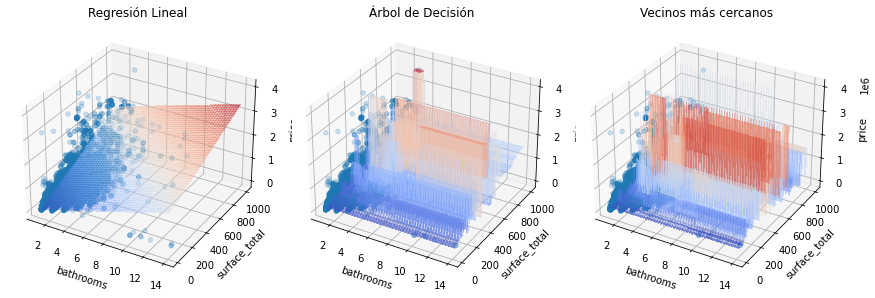

In [ ]:
fig = plt.figure(figsize = (12,4))
ax = fig.add_subplot(131, projection='3d')
plt.title('Regresión Lineal')
plot_3d_regressor(1, 14, 15, 1000, 100, linear_model, ax, fig)
plot_3d_scatter(x1, x2, y, ax, fig)

ax = fig.add_subplot(132, projection='3d')
plt.title('Árbol de Decisión')
plot_3d_regressor(1, 14, 15, 1000, 100, tree_regressor, ax, fig)
plot_3d_scatter(x1, x2, y, ax, fig)

ax = fig.add_subplot(133, projection='3d')
plt.title('Vecinos más cercanos')
plot_3d_regressor(1, 14, 15, 1000, 100, knn_regressor, ax, fig)
plot_3d_scatter(x1, x2, y, ax, fig)

plt.tight_layout()
plt.show()

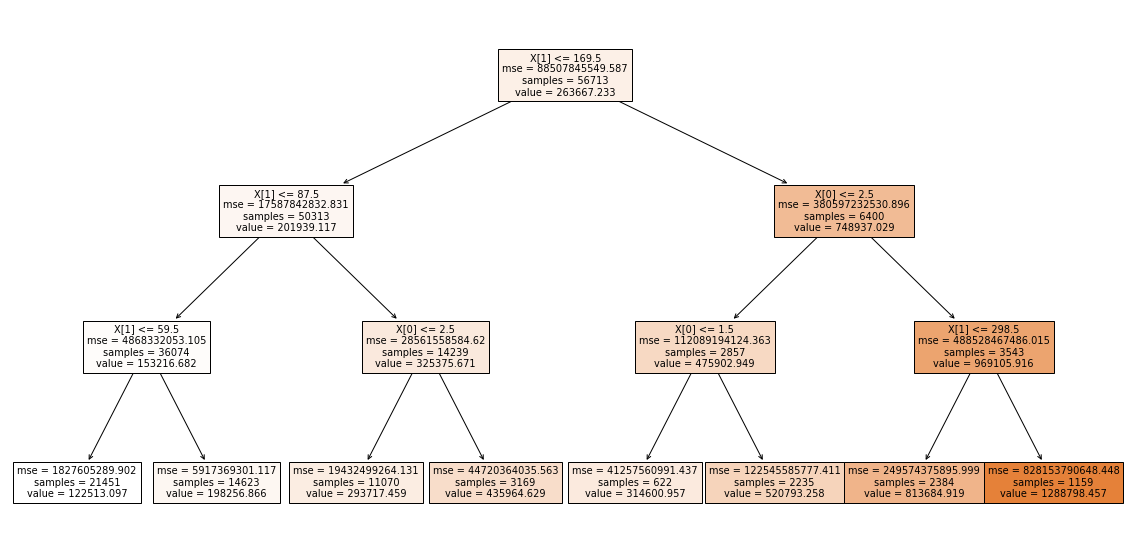

In [ ]:
from sklearn import tree

#if tree_regressor.max_depth < 10:

if tree_regressor.max_depth < 5:
    plt.figure(figsize = (20,10))
    tree.plot_tree(tree_regressor, filled = True)
    plt.show()

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 203015.35633339902
Raíz del error cuadrático medio en Test: 205955.81413686287


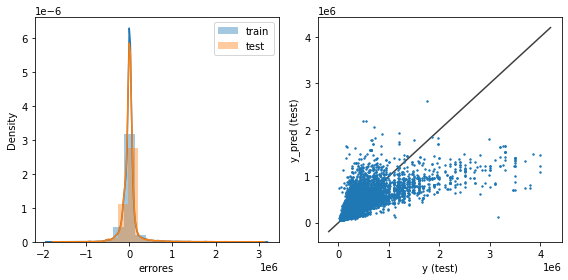

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 202993.54524281574
Raíz del error cuadrático medio en Test: 204792.88471910908


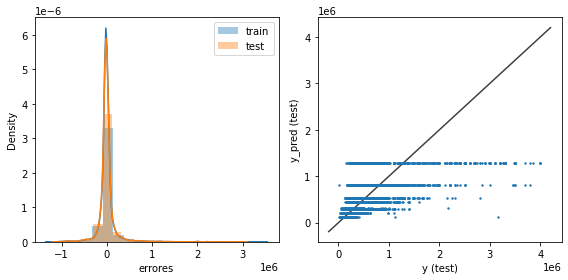

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 171614.83057833745
Raíz del error cuadrático medio en Test: 197076.72065815085


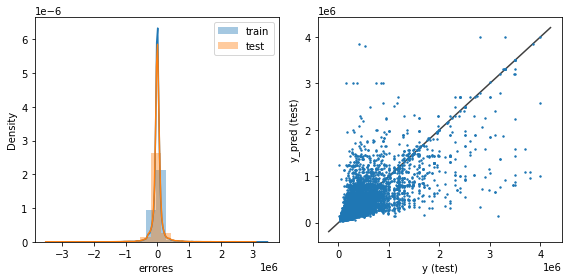

In [ ]:
#ahora calculamos y vemos los errores medios en cada tipo de modelo usado.
#observamos el RMSE para cada conjunto de train y test.

from sklearn.metrics import mean_squared_error

modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([linear_model, tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print(f'Modelo: {modelos[i]}')
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]

    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')

    plt.tight_layout()
    plt.show()

In [ ]:
#vuelvo a imprimir los datos del train split
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(56713, 2) (56713,) (24306, 2) (24306,)


In [ ]:
# Calculo del error con numero de vecinos - entre 1 and 50

errorKNN_train = []
errorKNN_test = []
diferencia_entre_errores = []

for i in range(1, 50):
    knn_regressor = KNeighborsRegressor(n_neighbors=i)
    knn_regressor.fit(X_train, y_train)
    y_train_pred = knn_regressor.predict(X_train)
    y_test_pred = knn_regressor.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    errorKNN_train.append(rmse_train)
    errorKNN_test.append(rmse_test)
    diferencia_entre_errores = np.array(errorKNN_test)-np.array(errorKNN_train)

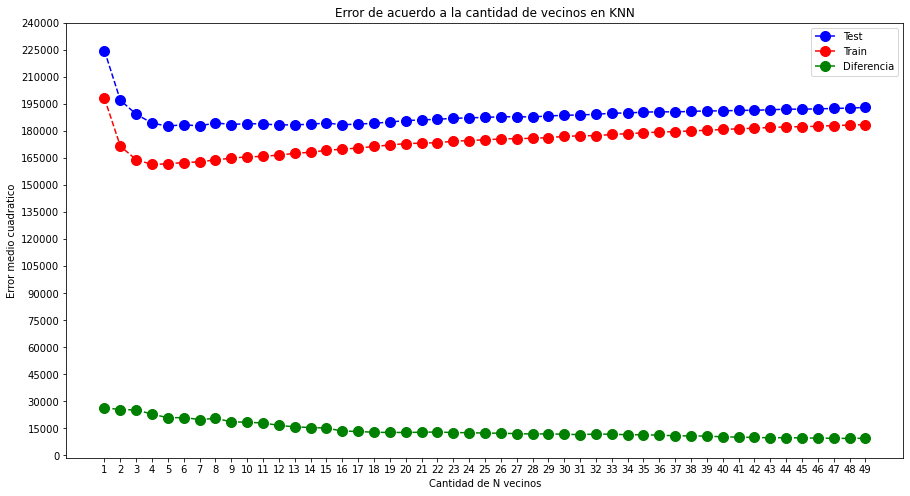

In [ ]:
#grafico del error con diferentes numeros de vecinos en KNN

plt.figure(figsize=(15, 8))
plt.plot(range(1, 50), errorKNN_test,  color='blue', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10, label='Test')
plt.plot(range(1, 50), errorKNN_train, color='red', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10, label='Train')
plt.plot(range(1, 50), diferencia_entre_errores, color='green', linestyle='dashed',
         marker='o', markerfacecolor='green', markersize=10, label='Diferencia')
plt.title('Error de acuerdo a la cantidad de vecinos en KNN')
plt.xlabel('Cantidad de N vecinos')
plt.ylabel('Error medio cuadratico')
plt.xticks(np.arange (1, 50, step = 1))
plt.yticks(np.arange (0, 250000, step = 15000))
plt.legend()
plt.show()

In [ ]:
# Calculo del error con profundidad del arbol - entre 1 and 50

errorTREE_train = []
errorTREE_test = []
diferencia_entre_erroresTREE = []

for i in range(1, 50):
    tree_regressor = DecisionTreeRegressor(max_depth=i, random_state=42)
    tree_regressor.fit(X_train, y_train)
    y_train_pred = tree_regressor.predict(X_train)
    y_test_pred = tree_regressor.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    errorTREE_train.append(rmse_train)
    errorTREE_test.append(rmse_test)
    diferencia_entre_erroresTREE = np.array(errorTREE_test)-np.array(errorTREE_train)


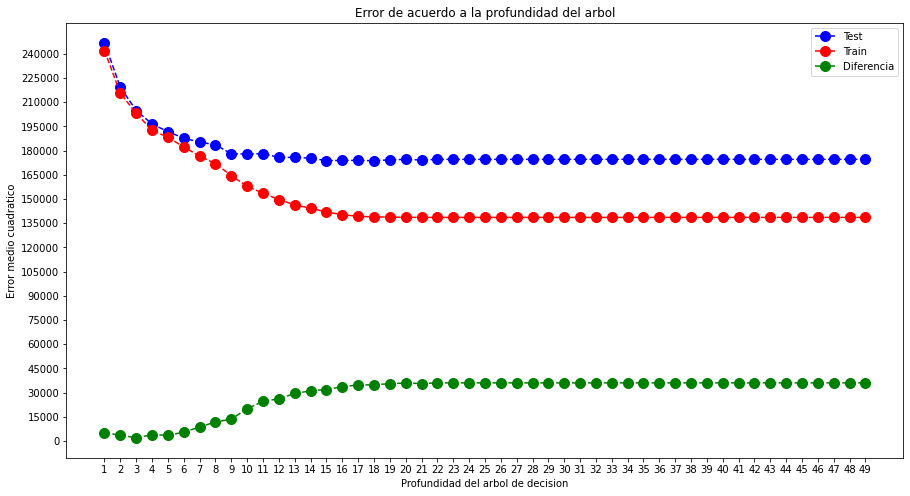

In [ ]:
#grafico del error con profundidad del arbol
plt.figure(figsize=(15, 8))
plt.plot(range(1, 50), errorTREE_test,  color='blue', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10, label='Test')
plt.plot(range(1, 50), errorTREE_train, color='red', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10, label='Train')
plt.plot(range(1, 50), diferencia_entre_erroresTREE, color='green', linestyle='dashed',
         marker='o', markerfacecolor='green', markersize=10, label='Diferencia')
plt.title('Error de acuerdo a la profundidad del arbol')
plt.xlabel('Profundidad del arbol de decision')
plt.ylabel('Error medio cuadratico')
plt.xticks(np.arange (1, 50, step = 1))
plt.yticks(np.arange (0, 250000, step = 15000))
plt.legend()
plt.show()

In [ ]:
#generero nuevamente los modelos
linear_model = LinearRegression()
tree_regressor = DecisionTreeRegressor(max_depth=9, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=15)

In [ ]:
#Vuelvo a generar el modelo benchmark y evaluarlo.

linear_model.fit(X_train, y_train)
tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=15)

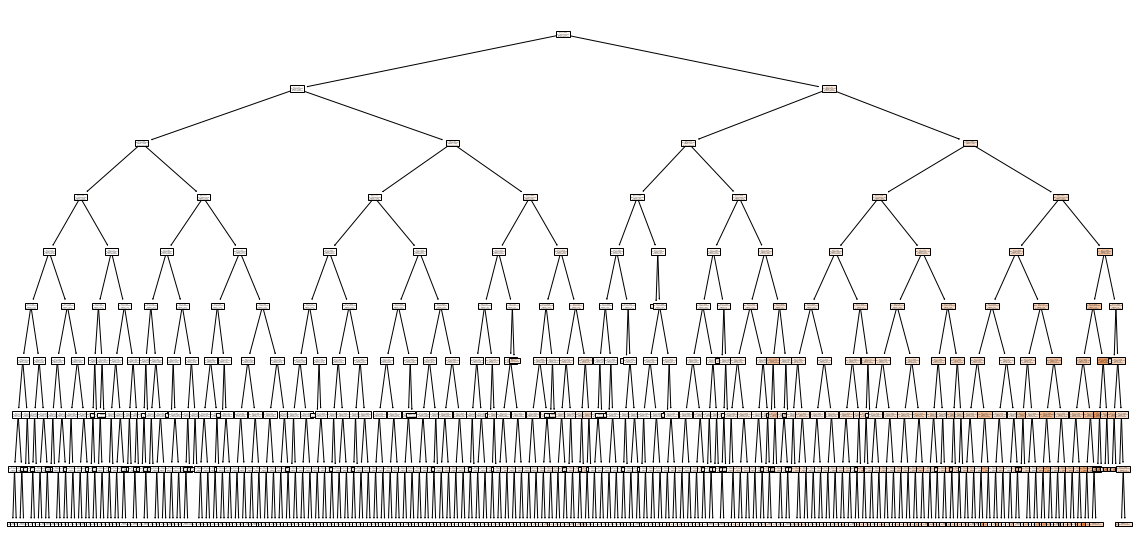

In [ ]:
#grafico el arbol de decision nuevamente:
if tree_regressor.max_depth:
    plt.figure(figsize = (20,10))
    tree.plot_tree(tree_regressor, filled = True)
    plt.show()

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 203015.35633339902
Raíz del error cuadrático medio en Test: 205955.81413686287


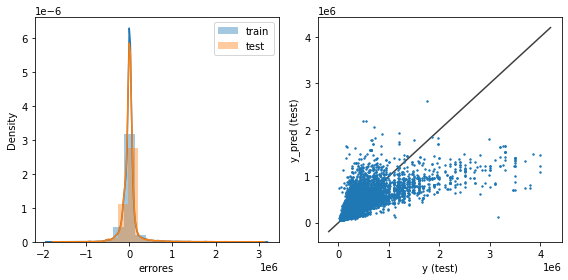

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 164462.09232032398
Raíz del error cuadrático medio en Test: 177954.20409256668


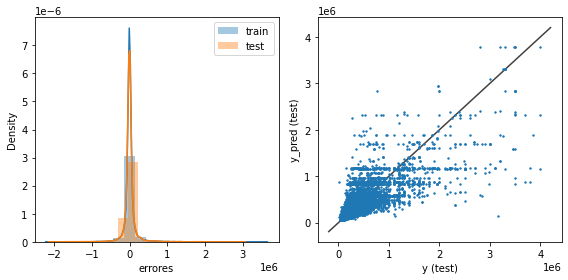

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 169287.11925475684
Raíz del error cuadrático medio en Test: 184477.0973693032


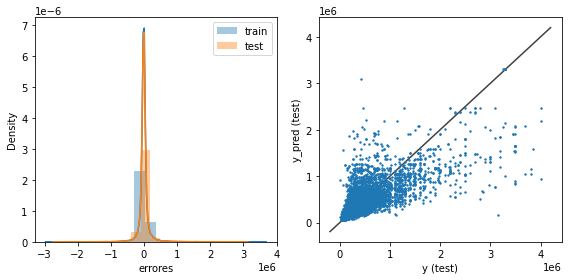

In [ ]:
#vuelvo a calcular los errores medios en cada tipo de modelo usado.
#observamos el RMSE para cada conjunto de train y test.

from sklearn.metrics import mean_squared_error

modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([linear_model, tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print(f'Modelo: {modelos[i]}')
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]

    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')

    plt.tight_layout()
    plt.show()